In [100]:
import os

def gen_init():
    results_path = "/Users/sakshmenon/Desktop/results"
    os.chdir(results_path)
    files = [file.name for file in os.scandir()]
    
    file_map = {'pc': {'sp': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'sc': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'td': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'td_sp_sc': {'bfs': '','bts': '','graph': '', 'faiss': ''}},
                'pj': {'sp': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'sc': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'td': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'td_sp_sc': {'bfs': '','bts': '','graph': '', 'faiss': ''}},
                'pm': {'sp': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'sc': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'td': {'bfs': '','bts': '','graph': '', 'faiss': ''}, 'td_sp_sc': {'bfs': '','bts': '','graph': '', 'faiss': ''}}}
    
    # file_map = {'pc': {'bfs': [],'bts': [],'graph': [], 'faiss': []},
    #             'pj': {'bfs': [],'bts': [],'graph': [], 'faiss': []},
    #             'pm': {'bfs': [],'bts': [],'graph': [], 'faiss': []}}

    for file in files:
        segments = file.split('.')
        organisms = segments[0]
        algorithm = segments[1]
        mode = segments[2]

        organisms = organisms.split('2')
        org1 = organisms[0]
        org2 = organisms[1]

        org1 = org1[:3:2]

        if mode == 'k3':
            org2 = org2[0] + org2[org2.find('_') + 1]

        file_map[org1][org2][algorithm] = file

    return file_map

In [101]:
file_map = gen_init()
file_map
# org:{algo:{orgs}}

{'pc': {'sp': {'bfs': 'p_carinii2s_pombe.bfs.k3.txt',
   'bts': 'p_carinii2s_pombe.bts.k3.txt',
   'graph': 'p_carinii2s_pombe.graph.k3.txt',
   'faiss': 'p_carinii2s_pombe.faiss.k3.txt'},
  'sc': {'bfs': 'p_carinii2s_cerevisiae.bfs.k3.txt',
   'bts': 'p_carinii2s_cerevisiae.bts.k3.txt',
   'graph': 'p_carinii2s_cerevisiae.graph.k3.txt',
   'faiss': 'p_carinii2s_cerevisiae.faiss.k3.txt'},
  'td': {'bfs': 'p_carinii2taphrina_deformans.bfs.k3.txt',
   'bts': 'p_carinii2taphrina_deformans.bts.k3.txt',
   'graph': 'p_carinii2taphrina_deformans.graph.k3.txt',
   'faiss': 'p_carinii2taphrina_deformans.faiss.k3.txt'},
  'td_sp_sc': {'bfs': 'p_carinii2td_sp_sc.bfs.k5.txt',
   'bts': 'p_carinii2td_sp_sc.bts.k5.txt',
   'graph': 'p_carinii2td_sp_sc.graph.k5.txt',
   'faiss': 'p_carinii2td_sp_sc.faiss.k5.txt'}},
 'pj': {'sp': {'bfs': 'p_jirovecii2s_pombe.bfs.k3.txt',
   'bts': 'p_jirovecii2s_pombe.bts.k3.txt',
   'graph': 'p_jirovecii2s_pombe.graph.k3.txt',
   'faiss': 'p_jirovecii2s_pombe.faiss.

In [99]:
import re
org2s = ['sc', 'sp', 'td', 'td_sp_sc']
algos = ['bfs', 'bts', 'graph', 'faiss']

algo_map = {'bfs': [],'bts': [],'graph': [], 'faiss': []}
algo_query_map = {'bfs': [],'bts': [],'graph': [], 'faiss': []}


def extract_queries(file_map, org1, org2):
    pattern = r"Query:\s+>([\w.]+)\s.*?\nTop1:\s+[\d.]+\s+>([\w.]+)"
    algo_dict = file_map[org1][org2]
    for algo in algos:
        file = algo_dict[algo]
        with open(file) as obj:
            queries = {}
            file_content = obj.read()
            query_top1_pairs = re.findall(pattern, file_content)
            query_top1_dict = {query: top1 for query, top1 in query_top1_pairs}
            for id in query_top1_dict:
                if id not in queries:
                    queries.update({id: query_top1_dict[id]})
                else:
                    queries[id].append(query_top1_dict[id])
                algo_map[algo].append(query_top1_dict[id])
            algo_query_map[algo] = queries

    return queries, algo_query_map


In [104]:
import matplotlib.pyplot as plt
from venn import venn

def plot_venn_4_sets(sets_dict, org1, org2):
    venn(sets_dict)
    plt.title(str(org1) + ' - ' + str(org2) + " Venn Diagram")
    plt.show()

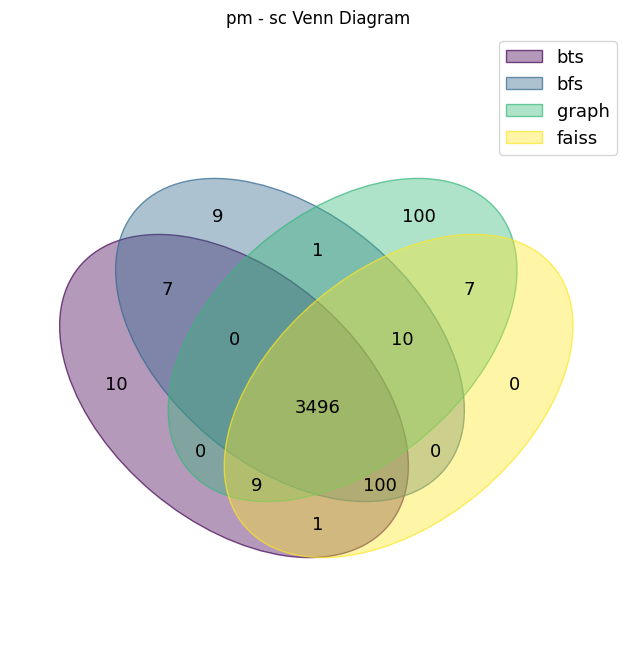

In [119]:
org1 = 'pm'
org2 = 'sc'
queries, aqm = extract_queries(file_map, org1, org2)

plot_set = {
'bts': {str(key) + ' ' + str(value) for key, value in aqm['bts'].items()},
'bfs': {str(key) + ' ' + str(value) for key, value in aqm['bfs'].items()},
'graph': {str(key) + ' ' + str(value) for key, value in aqm['graph'].items()},
'faiss': {str(key) + ' ' + str(value) for key, value in aqm['faiss'].items()}
}

plot_venn_4_sets(plot_set, org1, org2)
